In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sample_image(img, factor):
    down = cv2.resize(img, (img.shape[1] // factor, img.shape[0] // factor), interpolation=cv2.INTER_NEAREST)
    up = cv2.resize(down, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    return up

In [25]:
def quantize_image(img, levels):
    # Quantize grayscale image to given number of levels
    quantized = np.floor(img / (256 / levels)) * (256 / levels)
    return quantized.astype(np.uint8)

In [27]:
def analyze_quantized_levels(img, color_space):
    if color_space == 'RGB':
        print(f"\nUnique R levels: {np.unique(img[:, :, 0])}")
        print(f"Unique G levels: {np.unique(img[:, :, 1])}")
        print(f"Unique B levels: {np.unique(img[:, :, 2])}")
    elif color_space == 'HSV':
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        print(f"\nUnique H levels: {np.unique(hsv[:, :, 0])}")
        print(f"Unique S levels: {np.unique(hsv[:, :, 1])}")
        print(f"Unique V levels: {np.unique(hsv[:, :, 2])}")

In [47]:
image = cv2.imread(r"C:\Users\ML\Desktop\123B1F028\flower.jpg")
if image is None:
    print("Image not found!")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

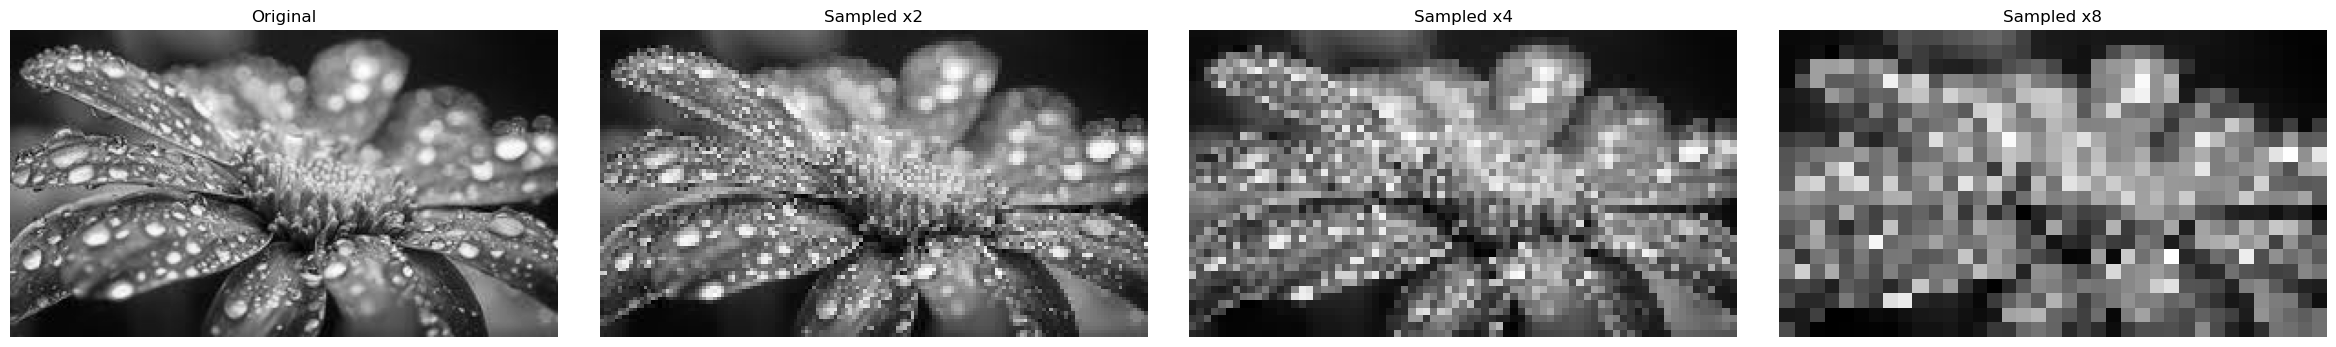

In [59]:
sample_factors = [2, 4, 8]
plt.figure(figsize=(24, 10))
plt.subplot(1, len(sample_factors)+1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, factor in enumerate(sample_factors):
    sampled = sample_image(gray, factor)
    plt.subplot(1, len(sample_factors)+1, i+2)
    plt.imshow(sampled, cmap='gray', interpolation='nearest')
    plt.title(f"Sampled x{factor}")
    plt.axis('off')
plt.tight_layout(pad=3.0)
plt.show()


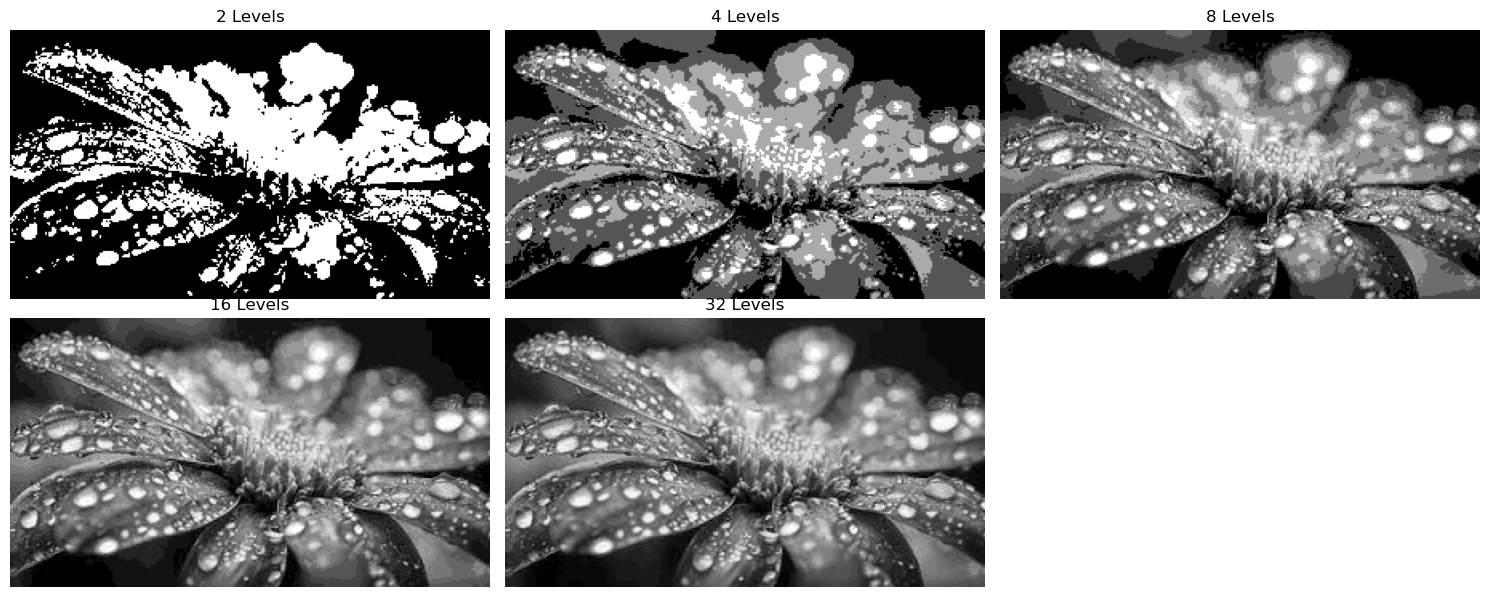

In [61]:
quant_levels = [2, 4, 8, 16, 32]
plt.figure(figsize=(15, 6))
for i, level in enumerate(quant_levels):
    quant = quantize_image(gray, level)
    plt.subplot(2, 3, i+1)
    plt.imshow(quant, cmap='gray')
    plt.title(f"{level} Levels")
    plt.axis('off')
plt.tight_layout()
plt.show()

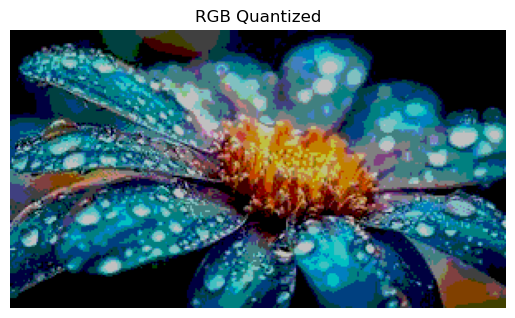


Unique R levels: [  0  64 128 192]
Unique G levels: [  0  64 128 192]
Unique B levels: [  0  64 128 192]

Unique H levels: [  0  10  15  20  30  60  75  80  90 100 105 120 150 165]
Unique S levels: [  0  85 128 170 255]
Unique V levels: [  0  64 128 192]


In [67]:
img = cv2.imread(r"C:\Users\ML\Desktop\123B1F028\flower.jpg") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [76]:
# Quantization function
def quantize_channel(channel, levels):
    div = 256 // levels
    return (channel // div) * div

In [78]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

h_q = quantize_channel(h, 12)  # Hue quantized into 12 bins
s_q = quantize_channel(s, 4)   # Saturation 4 levels
v_q = quantize_channel(v, 4)   # Value 4 levels

hsv_q = cv2.merge([h_q, s_q, v_q])
hsv_q_rgb = cv2.cvtColor(hsv_q, cv2.COLOR_HSV2RGB)

In [80]:
# ---------------- YCbCr Quantization ----------------
ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
y, cb, cr = cv2.split(ycbcr)

y_q = quantize_channel(y, 16)   # More levels for luminance
cb_q = quantize_channel(cb, 8)  # Fewer for chroma
cr_q = quantize_channel(cr, 8)

ycbcr_q = cv2.merge([y_q, cb_q, cr_q])
ycbcr_q_rgb = cv2.cvtColor(ycbcr_q, cv2.COLOR_YCrCb2RGB)

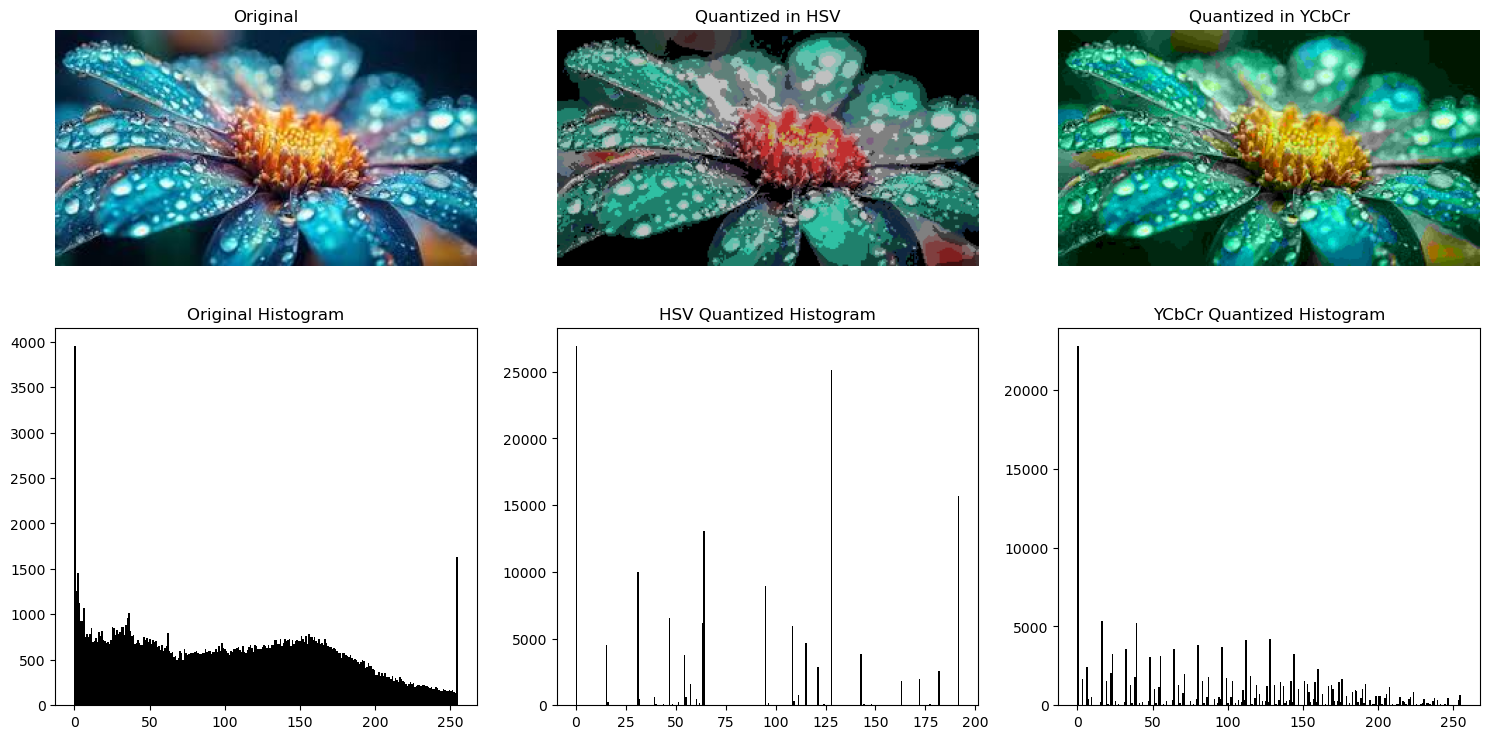

In [82]:
# ---------------- Visualization ----------------
fig, axs = plt.subplots(2, 3, figsize=(15,8))

axs[0,0].imshow(img)
axs[0,0].set_title("Original")
axs[0,0].axis("off")

axs[0,1].imshow(hsv_q_rgb)
axs[0,1].set_title("Quantized in HSV")
axs[0,1].axis("off")

axs[0,2].imshow(ycbcr_q_rgb)
axs[0,2].set_title("Quantized in YCbCr")
axs[0,2].axis("off")

axs[1,0].hist(img.ravel(), bins=256, color='black')
axs[1,0].set_title("Original Histogram")

axs[1,1].hist(hsv_q_rgb.ravel(), bins=256, color='black')
axs[1,1].set_title("HSV Quantized Histogram")

axs[1,2].hist(ycbcr_q_rgb.ravel(), bins=256, color='black')
axs[1,2].set_title("YCbCr Quantized Histogram")

plt.tight_layout()
plt.show()